<a href="https://colab.research.google.com/github/Fatiawa/gueye/blob/master/Copie_de_G5_House_Price_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOUSE PRICE PREDICTION**

### Introduction :

L'objetif de ce projet de machine learning est de construire différents modèles de machine learning pour la prédiction de maisons basé sur l'analyse de 80 variables descriptives comme la zone, l'année de construction etc.

Elle a été fait en 3 phases: 


1.   Phase 1: Imporation, Nettoyage etr exploration des données.
2.   Phase 2: Construction de Modèle ML, Validation et prediction.
3.   Phase 3: Analyse des resultats








### Modules et packages necessaires

In [ ]:
# Importation des librairies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm

- Importation 

In [ ]:
#Importation de la base
data = pd.read_csv('/content/train.csv')

###  Analyse exploratoire 

In [ ]:
# Notre base est composée de 1460 observations et 81 variables
data.shape

(1460, 81)

In [ ]:
# Moyenne, écart-type , variance des variables numériques 
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


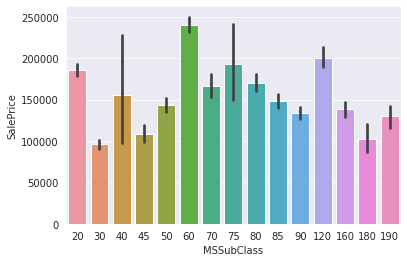

In [ ]:
#le prix en fonction de chaque type de logement concerné par la vente 
sns.barplot(data.MSSubClass, data.SalePrice)

Les logements de type 2-STORY 1946 & NEWER ont les plus grands prix de vente.  Les logements de type 1-story 1945 et Older ont le plus bas de prix de vente


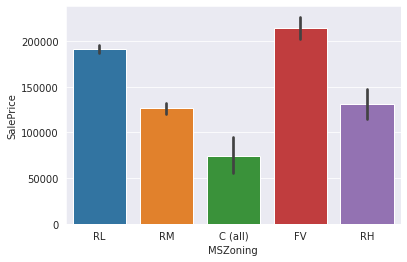

In [ ]:
# le prix en fonction de la zone
sns.barplot(data.MSZoning, data.SalePrice)

Les maisons se situant dans la zone  Flotting Village Residential sont les plus couteux. 

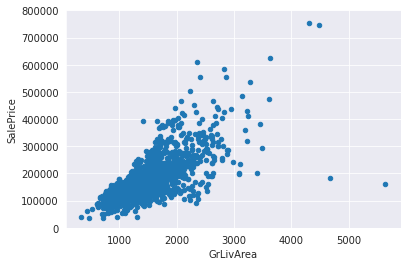

In [ ]:
# relatation between Grlive and SalePrice
var = 'GrLivArea'
dt = pd.concat([data['SalePrice'], data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

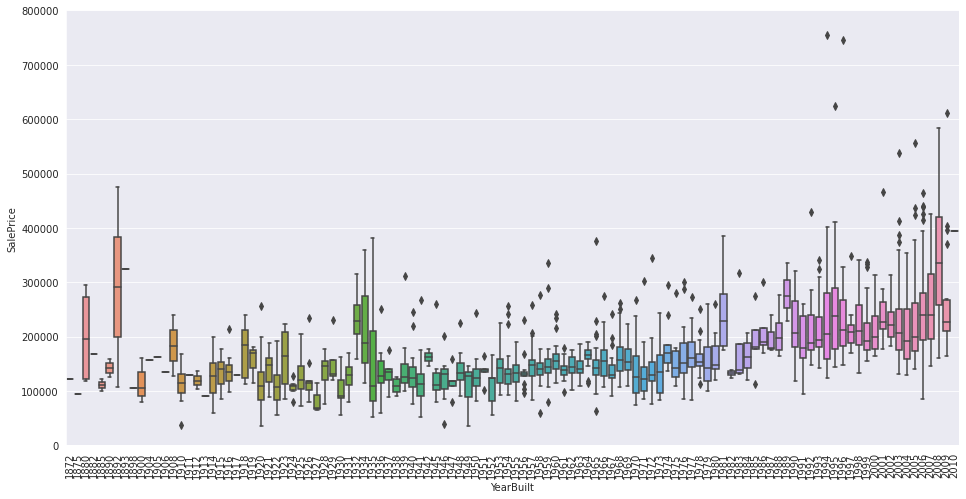

In [ ]:
#
var = 'YearBuilt'
dt = pd.concat([data['SalePrice'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Nous remarquons que les maisons construites assez recenment sont plus couteuses que les maisons anciennes. Cependant, on a des exceptions notanment pour 1892 et 2009.

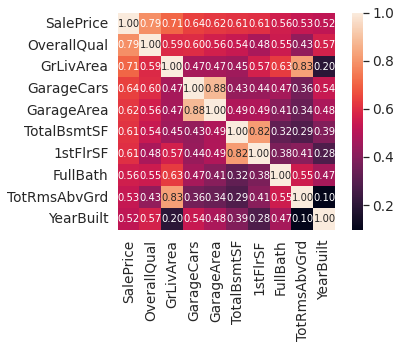

In [ ]:
# la corrélation entre les caractéristiques
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


Sur ce graphe, nous avons les variables les plus corrélées deux à deux.

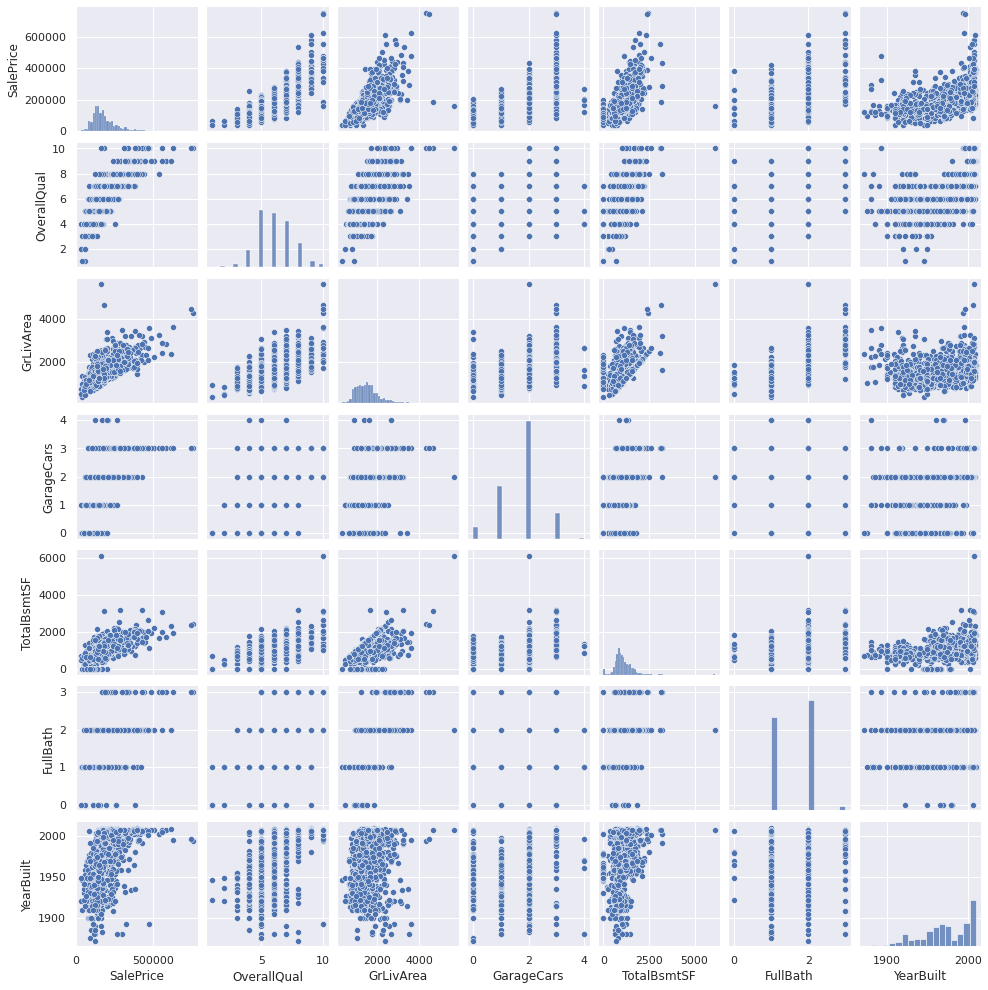

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], height= 2)
plt.show();

Après l'étude des liens pouvant exister entre nos variables, nous avons fait un scatterplot pour approfondir notre analyse. 

- Nettoyage des données

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


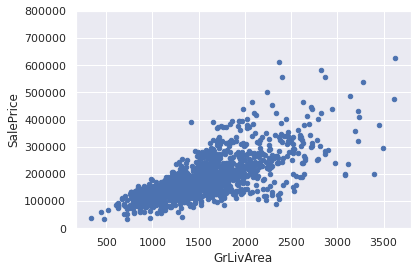

In [ ]:
#Suppression des outliers de Grlive
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
data=  data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']>700000)].index)
var = 'GrLivArea'
dt = pd.concat([data['SalePrice'], data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

NameError: ignored

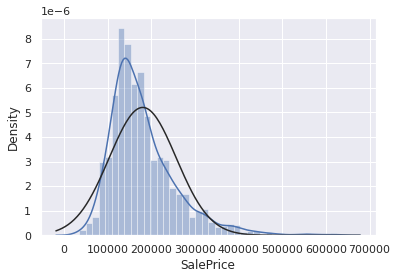

In [ ]:
sns.distplot(data['SalePrice'] , fit=norm);
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

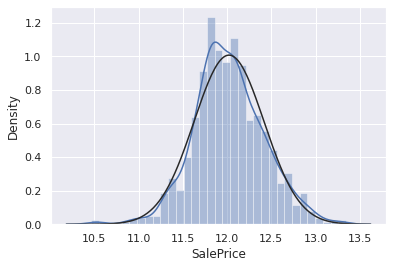

In [ ]:
# Utilisons du log pour la normalisation de la variable cible
# Transformation
data["SalePrice"] = np.log1p(data["SalePrice"])
sns.distplot(data['SalePrice'] , fit=norm);

In [ ]:
# Pourcentage des données manquantes
all_data_na = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([all_data_na, percent], axis=1, keys=['Total', 'Percent'])
missing_data


,Total,Percent
PoolQC,1451,0.996566
MiscFeature,1402,0.962912
Alley,1365,0.937500
Fence,1176,0.807692
FireplaceQu,690,0.473901
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

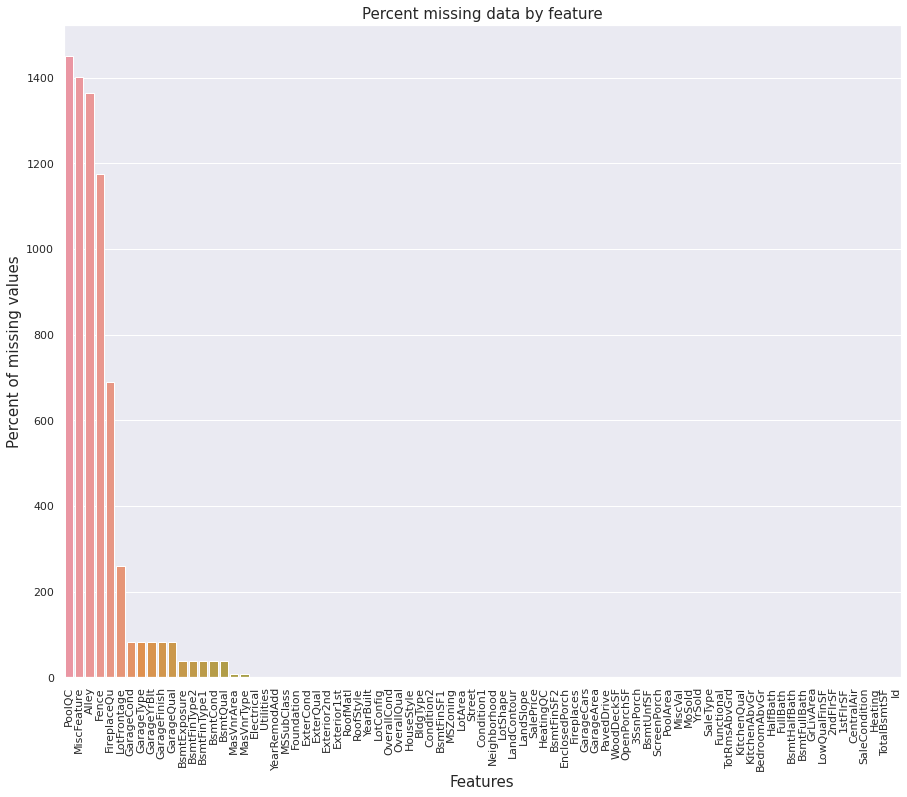

In [ ]:
# Représentation graphique du pourcentages de ces valeurs
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [ ]:
# Identification des variables catégorielles 
categorical_cols = data.select_dtypes(include=['object'])
categorical_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Nous avons 43 variables catégorielles

In [ ]:
# Identification des variables numériques 
numeric_cols = data.select_dtypes(exclude=['object'])
numeric_cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,11.864469


Nous avons 38 variables numériques






In [ ]:
# le type des variables numériques
numeric_cols.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

Les variables numériques sont de type entiers ( int64 ) et floats ( float64 )

In [ ]:
# vérification des valeurs numériques ayant des données manquants
numeric_cols.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Nous avons 2 variables numériques ( LotFrontage ,GarageYrBlt ) ayant des données manquantes

In [ ]:

# Recupérer les variables numériques 
numeric_variable = data.dtypes != object
numeric_variable = data.columns[numeric_variable].tolist()
# Imputer les valeurs manquantes de ces variables par la moyenne
for i in numeric_variable:
  numeric_cols.loc[numeric_cols.loc[:,i].isnull(),i]=numeric_cols.loc[:,i].mean()


In [ ]:
# # Vérification des valeurs manquants après l'imputation
numeric_cols.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Après l'imputation, nous remarquons que nous avons plus de données manquantes sur les variables numériques 

In [ ]:
# Recodage des variables catégorielles en variables numériques
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_1 = categorical_cols.apply(lambda col: lb.fit_transform(col.astype(str)))
df_1.head(10)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,3,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,3,3,2,5,1,0,1,4,2,6,5,1,1,4,4,2,3,4,4,8,4
1,3,1,2,3,3,0,2,0,24,1,2,0,2,1,0,8,8,2,3,4,1,2,3,1,0,5,1,0,1,4,3,6,4,1,1,4,4,2,3,4,4,8,4
2,3,1,2,0,3,0,4,0,5,2,2,0,5,1,0,12,13,1,2,4,2,2,3,2,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4
3,3,1,2,0,3,0,0,0,6,2,2,0,5,1,0,13,15,2,3,4,0,3,1,3,0,5,1,2,1,4,2,6,2,5,2,4,4,2,3,4,4,8,0
4,3,1,2,0,3,0,2,0,15,2,2,0,5,1,0,12,13,1,2,4,2,2,3,0,2,5,1,0,1,4,2,6,4,1,1,4,4,2,3,4,4,8,4
5,3,1,2,0,3,0,4,0,11,2,2,0,0,1,0,12,13,2,3,4,5,2,3,3,2,5,1,0,1,4,3,6,5,1,2,4,4,2,3,2,2,8,4
6,3,1,2,3,3,0,4,0,21,2,2,0,2,1,0,12,13,3,2,4,2,0,3,0,2,5,1,0,1,4,2,6,2,1,1,4,4,2,3,4,4,8,4
7,3,1,2,0,3,0,0,0,14,4,2,0,5,1,0,6,6,3,3,4,1,2,3,2,0,1,1,0,1,4,3,6,4,1,1,4,4,2,3,4,2,8,4
8,4,1,2,3,3,0,4,0,17,0,2,0,0,1,0,3,15,2,3,4,0,3,3,3,5,5,1,2,1,1,3,2,4,5,2,1,4,2,3,4,4,8,0
9,3,1,2,3,3,0,0,0,3,0,0,1,1,1,0,8,8,2,3,4,0,3,3,3,2,5,1,0,1,4,3,6,4,1,1,2,4,2,3,4,4,8,4


In [ ]:
# # Vérification des valeurs manquants après l'imputation
df_1.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
# Fusion des deux tableaux 
my_data = pd.concat([df_1, numeric_cols], axis=1, ignore_index=False)
my_data.shape

(1456, 81)

### Implémentation des différents modèles 

In [ ]:
# Définir X et y avant de diviser en données de train de de test
X = my_data.drop(columns = ['SalePrice','Id'], axis=1)
y = my_data['SalePrice']


In [ ]:
# Importation de  scikit learn
from sklearn.model_selection import train_test_split
# Diviser les données en données de train et de test
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
X_train, x_test, y_train, y_test

(      MSZoning  Street  Alley  LotShape  ...  PoolArea  MiscVal  MoSold  YrSold
 1403         3       1      2         0  ...       0.0      0.0     8.0  2007.0
 1312         3       1      2         0  ...       0.0      0.0     6.0  2007.0
 680          3       1      2         3  ...       0.0      0.0     5.0  2010.0
 639          3       1      2         3  ...       0.0      0.0    10.0  2006.0
 247          3       1      2         3  ...       0.0      0.0     6.0  2006.0
 ...        ...     ...    ...       ...  ...       ...      ...     ...     ...
 765          3       1      2         0  ...       0.0      0.0     8.0  2008.0
 837          4       1      2         3  ...       0.0      0.0    11.0  2008.0
 1219         4       1      2         3  ...       0.0      0.0     4.0  2006.0
 560          3       1      2         0  ...       0.0      0.0     5.0  2010.0
 685          3       1      2         0  ...       0.0      0.0     9.0  2007.0
 
 [1164 rows x 79 columns],

In [ ]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((1164, 79), (292, 79), (1164,), (292,))

In [ ]:
# Regréssion linéaire
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)


In [ ]:
# Ajustement et Prédiction
lr.fit(X_train, y_train)
predict=lr.predict(x_test)


In [ ]:
# Coefficient de determination
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.9163200581013823

In [ ]:
# K nearest Kneighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor()
scores_knn = cross_val_score(knn, X_train, y_train, scoring='r2', cv=5)
scores_knn

array([0.72508479, 0.57825107, 0.70161459, 0.60771417, 0.60294928])

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree=DecisionTreeRegressor()
scores_tree = cross_val_score(tree, X_train, y_train, scoring='r2', cv=5)
scores_tree

array([0.69011963, 0.68082288, 0.80299289, 0.69426868, 0.62517264])

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest = RandomForestRegressor()
scores_forest= cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores_forest

array([0.89669701, 0.84145835, 0.89276363, 0.83057922, 0.84970274])

In [ ]:
# Ajustement et Prédiction
forest.fit(X_train, y_train)
predict_r=forest.predict(x_test)

In [ ]:
# Coefficient de determination
from sklearn.metrics import r2_score
r2_score(y_test, predict_r)


0.9018819103451352

In [ ]:
# Features importance
def plot_feature_importance(importance,names,model_type):
 #Create arrays from feature importance and feature names
	feature_importance = np.array(importance)
	feature_names = np.array(names)
	#Create a DataFrame using a Dictionary
	data={'feature_names':feature_names,'feature_importance':feature_importance}
	fi_df = pd.DataFrame(data)
	#Sort the DataFrame in order decreasing feature importance
	fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
	#Define size of bar plot
	plt.figure(figsize=(10,8))
	#Plot Searborn bar chart
	sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
	#Add chart labels
	plt.title(model_type + 'FEATURE IMPORTANCE')
	plt.xlabel('FEATURE IMPORTANCE')
	plt.ylabel('FEATURE NAMES')

In [ ]:
importance = forest.feature_importances_
names = forest.feature_names_in_

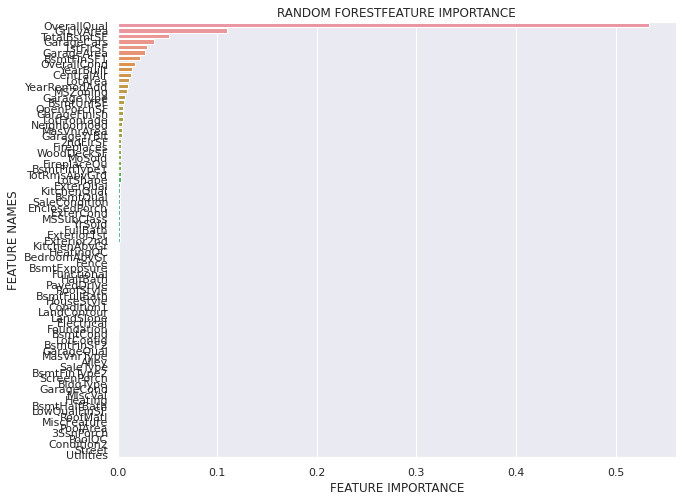

In [ ]:
plot_feature_importance(importance,names,"RANDOM FOREST")